# IBM HR Analytics Employee Attrition Modeling .
## DESCRIPTION

###   IBM is an American MNC operating in around 170 countries with major business vertical as 
###     computing, software, and hardware.
###     Attrition is a major risk to service-providing organizations 
###     where trained and experienced people are the assets of the company. 
###     The organization would like to identify the factors which influence the attrition of employees.

# 1 Import attrition dataset and import libraries such as pandas, matplotlib.pyplot, numpy, and seaborn.


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
data=pd.read_csv("IBM Attrition Data.csv")

In [7]:
data.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


In [10]:
data.columns

Index(['Age', 'Attrition', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'WorkLifeBalance', 'YearsAtCompany'],
      dtype='object')

In [11]:
data.shape

(1470, 13)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   Department               1470 non-null   object
 3   DistanceFromHome         1470 non-null   int64 
 4   Education                1470 non-null   int64 
 5   EducationField           1470 non-null   object
 6   EnvironmentSatisfaction  1470 non-null   int64 
 7   JobSatisfaction          1470 non-null   int64 
 8   MaritalStatus            1470 non-null   object
 9   MonthlyIncome            1470 non-null   int64 
 10  NumCompaniesWorked       1470 non-null   int64 
 11  WorkLifeBalance          1470 non-null   int64 
 12  YearsAtCompany           1470 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 149.4+ KB


In [14]:
data.isnull().sum()

Age                        0
Attrition                  0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EnvironmentSatisfaction    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
WorkLifeBalance            0
YearsAtCompany             0
dtype: int64

# 2. Find the age distribution of employees in IBM

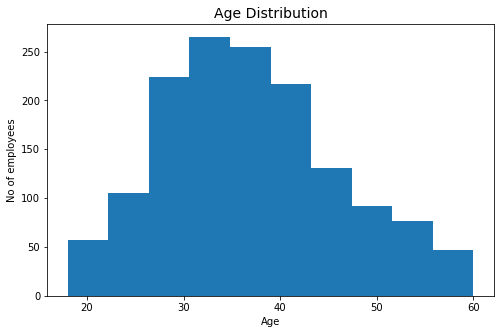

In [18]:
plt.figure(figsize=(8,5))
plt.hist(x='Age',data=data)
plt.xlabel("Age")
plt.ylabel("No of employees")
plt.title("Age Distribution",fontsize=14)
plt.show()

# 3. Explore attrition by age

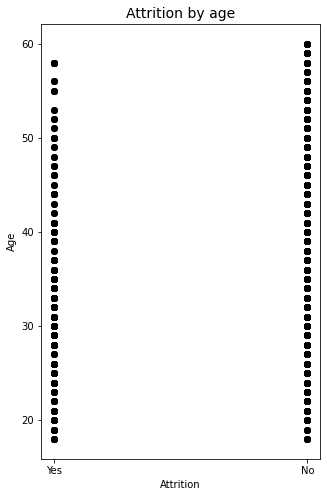

In [27]:
plt.figure(figsize=(5,8))
plt.scatter(x='Attrition',y='Age',data=data,color='black')
plt.xlabel("Attrition")
plt.ylabel("Age")
plt.title("Attrition by age",fontsize=14)
plt.show()

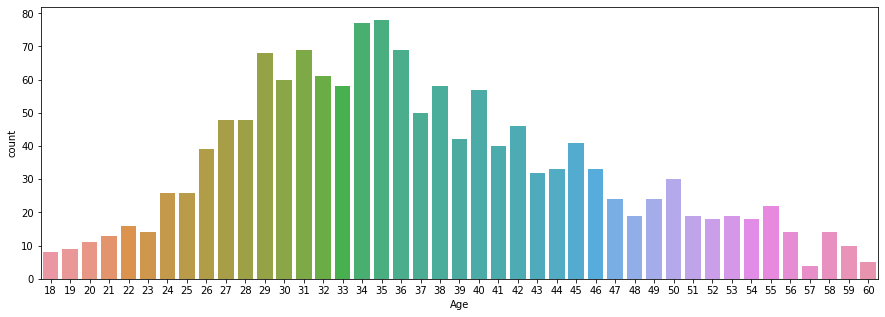

In [36]:
plt.figure(figsize=(15,5))
sns.countplot(x="Age",data=data)

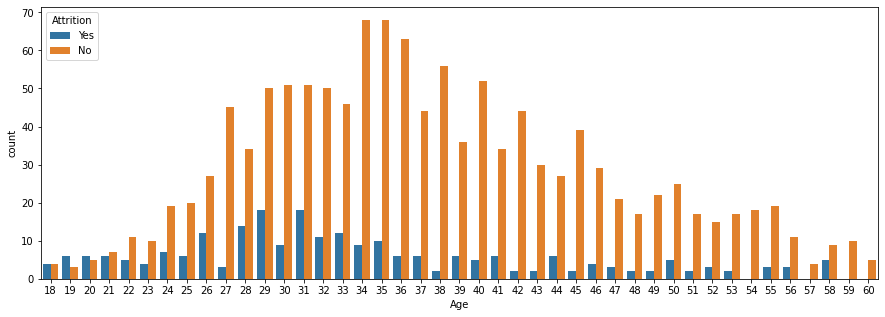

In [37]:
plt.figure(figsize=(15,5))
sns.countplot(x="Age",data=data,hue='Attrition')

# 4. Explore data for Left employees

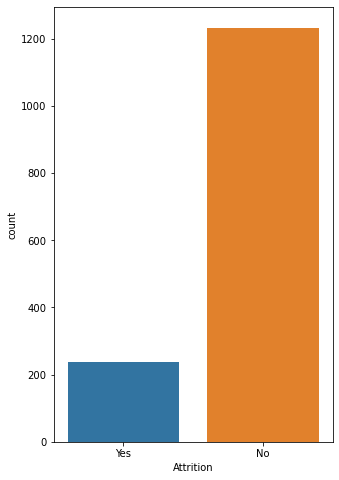

In [40]:
plt.figure(figsize=(5,8))
sns.countplot(x="Attrition",data=data)

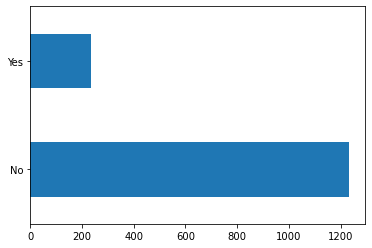

In [44]:
data.Attrition.value_counts().plot(kind='barh') #another way with matplotlib

# 5. Find out the distribution of employees by the education field

In [46]:
data.columns

Index(['Age', 'Attrition', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'WorkLifeBalance', 'YearsAtCompany'],
      dtype='object')

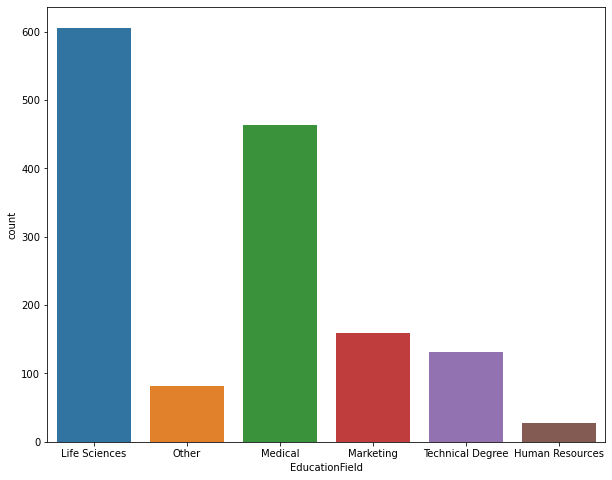

In [49]:
plt.figure(figsize=(10,8))
sns.countplot(x='EducationField',data=data)

# 6. Give a bar chart for the number of married and unmarried employees

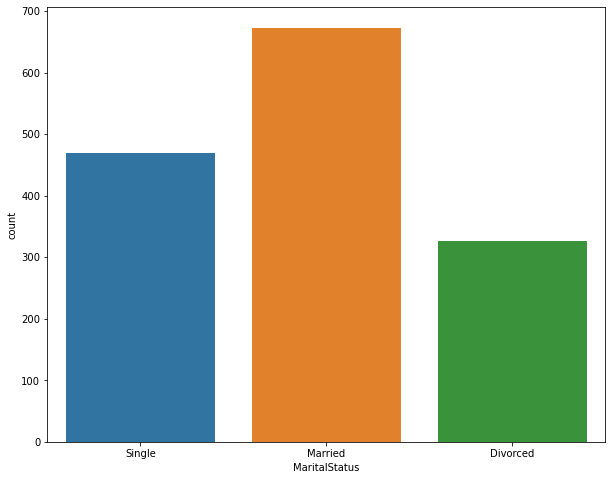

In [51]:
plt.figure(figsize=(10,8))
sns.countplot(x='MaritalStatus',data=data)

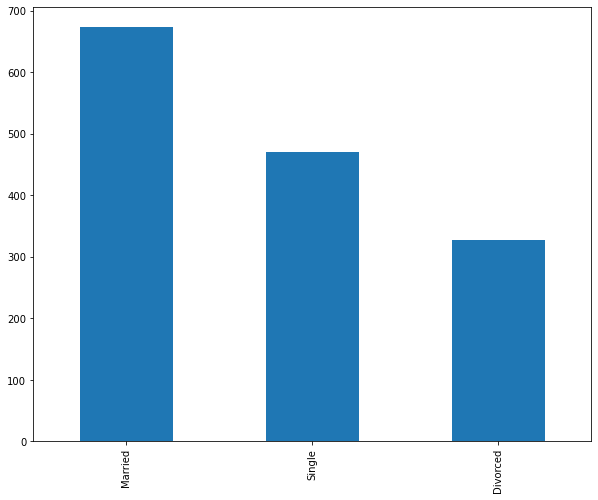

In [53]:
plt.figure(figsize=(10,8))
data.MaritalStatus.value_counts().plot(kind='bar')

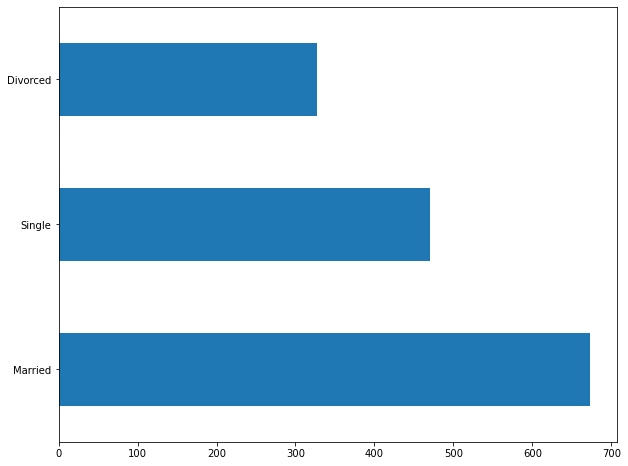

In [54]:
plt.figure(figsize=(10,8))
data.MaritalStatus.value_counts().plot(kind='barh')

# 7. Build up a logistic regression model to predict which employees are likely to attrite.



In [58]:
data.dtypes

Age                         int64
Attrition                  object
Department                 object
DistanceFromHome            int64
Education                   int64
EducationField             object
EnvironmentSatisfaction     int64
JobSatisfaction             int64
MaritalStatus              object
MonthlyIncome               int64
NumCompaniesWorked          int64
WorkLifeBalance             int64
YearsAtCompany              int64
dtype: object

## we could observe that features like Department, Educationfield and MartialStatus are of object datatypes.
## An ML model can be built only with numerical values, so we have to change string value to numerical values.

In [59]:
data['Department'].value_counts() #before

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [60]:
data['Department'].replace('Research & Development',1,inplace=True)
data['Department'].replace('Sales',2,inplace=True)
data['Department'].replace('Human Resources',3,inplace=True)


In [61]:
data['Department'].dtypes

dtype('int64')

In [62]:
data["Department"].value_counts() #after

1    961
2    446
3     63
Name: Department, dtype: int64

In [63]:
data['EducationField'].value_counts() #before

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [64]:
data['EducationField'].replace('Life Sciences',1,inplace=True)
data['EducationField'].replace('Medical',2,inplace=True)
data['EducationField'].replace('Marketing',3,inplace=True)
data['EducationField'].replace('Technical Degree',4,inplace=True)
data['EducationField'].replace('Other',5,inplace=True)
data['EducationField'].replace('Human Resources',6,inplace=True)

In [65]:
data['EducationField'].value_counts() #after

1    606
2    464
3    159
4    132
5     82
6     27
Name: EducationField, dtype: int64

In [67]:
data['MaritalStatus'].value_counts() #before

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

In [68]:
data['MaritalStatus'].replace('Married',1,inplace=True)
data['MaritalStatus'].replace('Single',2,inplace=True)
data['MaritalStatus'].replace('Divorced',3,inplace=True)

In [69]:
data['MaritalStatus'].value_counts() #after

1    673
2    470
3    327
Name: MaritalStatus, dtype: int64

In [70]:
# building up a logistic regression model
X=data.drop(['Attrition'],axis=1)
y=data['Attrition']

In [71]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=10)

In [72]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X,y)

C:\Users\Dell-pc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [73]:
# check the accuracy on training dataset
model.score(X,y)


0.8414965986394558

In [74]:
model.fit(X_train,y_train)

C:\Users\Dell-pc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [75]:
model.score(X_train,y_train)

0.8477891156462585

In [76]:
model.score(X_test,y_test)

0.8163265306122449

In [77]:
from sklearn.metrics import confusion_matrix,classification_report

In [78]:
confusion_matrix(y_test,model.predict(X_test))

array([[239,   0],
       [ 54,   1]], dtype=int64)

In [79]:
print(classification_report(y_test,model.predict(X_test)))

              precision    recall  f1-score   support

          No       0.82      1.00      0.90       239
         Yes       1.00      0.02      0.04        55

    accuracy                           0.82       294
   macro avg       0.91      0.51      0.47       294
weighted avg       0.85      0.82      0.74       294

